In [43]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Input, InputLayer,Flatten,Conv2D,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

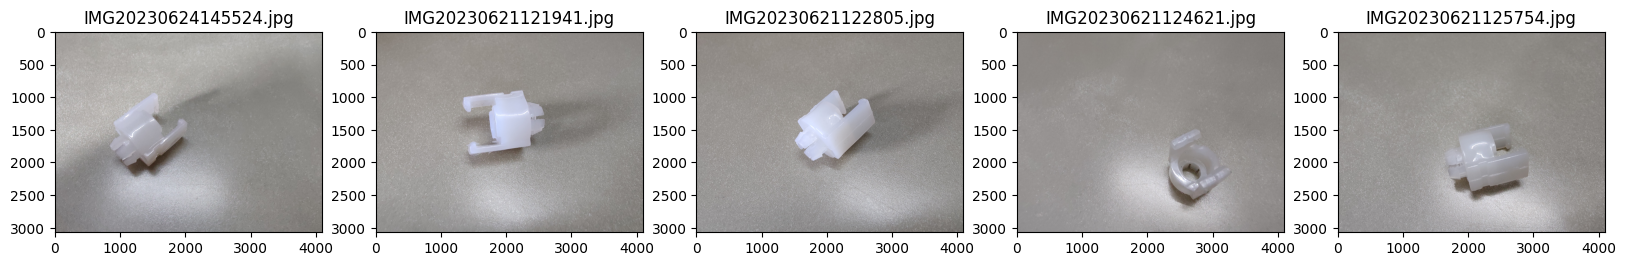

In [41]:
plt.figure(figsize=(20,20))
img_folder=r'C:\Users\Kabir\Documents\Part_Data\accepted pieces'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\Kabir\Documents\Part_Data'

In [5]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name  
img_data, class_name =create_dataset(r'C:\Users\Kabir\Documents\Part_Data')

In [6]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'accepted pieces': 0, 'rejected pieces': 1}

In [7]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]


In [16]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(img_data,target_val, test_size=0.10)

In [58]:
model =  Sequential()
model.add(Conv2D (150, (3, 3), input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Activation( 'relu'))
model.add(MaxPooling2D (pool_size=(2, 2)))
model.add(Conv2D (75, (3, 3)))
model.add(Activation( 'relu'))
model.add(MaxPooling2D (pool_size=(2, 2)))
model.add(Flatten())
# input layer


# hidden layer
model.add(Dense(39, activation='relu'))

model.add(Dense (1))
model.add(Activation ('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics  = ['accuracy'])

In [59]:
model.fit(x=np.array(X_train, np.float32), y=np.array(list(map(int,y_train)), np.float32), epochs=3, validation_data=(np.array(X_test, np.float32),  np.array(list(map(int,y_test)))),  validation_split=0.2)

Epoch 1/3
29/29 [==============================] - 130s 4s/step - loss: 0.8827 - accuracy: 0.6289 - val_loss: 0.6018 - val_accuracy: 0.7100
Epoch 2/3
29/29 [==============================] - 136s 5s/step - loss: 0.6272 - accuracy: 0.6833 - val_loss: 0.6038 - val_accuracy: 0.7100
Epoch 3/3
29/29 [==============================] - 148s 5s/step - loss: 0.6308 - accuracy: 0.6833 - val_loss: 0.6002 - val_accuracy: 0.7100


1


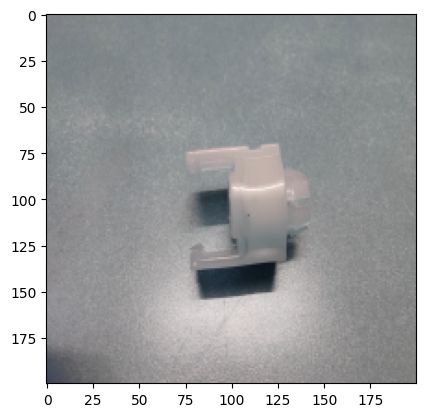

In [31]:
num  = 789


plt.imshow(img_data[num])
print(target_val[num])

In [55]:
model.save('AI_MOdel3.h5')